In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
import seaborn as sn

#sn.jointplot(x=df["Purchased"], y=df["Age"], data=df , color="Red")

x=df[["Age"	, "EstimatedSalary"]]

y=df["Purchased"]

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

lm=LogisticRegression()

In [6]:
lm.fit(x,y)

X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

lm.score(X_train, y_train)

0.640625

In [7]:
from sklearn.preprocessing import StandardScaler

ls=StandardScaler()

ls.fit(X_train,y_train)

StandardScaler()

In [8]:
X_train_trans=ls.fit_transform(X_train)
X_test_trans=ls.fit_transform(X_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [10]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

cm

array([[46,  6],
       [ 7, 21]])

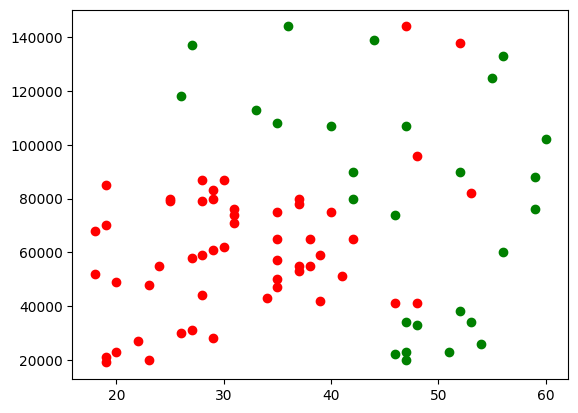

In [11]:
plt.scatter(X_test[y_pred==0]["Age"], X_test[y_pred==0]["EstimatedSalary"],c='r')
plt.scatter(X_test[y_pred==1]["Age"], X_test[y_pred==1]["EstimatedSalary"],c='g')

In [12]:
x=df[["Age","EstimatedSalary"]]
y=df["Purchased"]

In [13]:
best_accuracy = 0
best_random_state = None

best_state_accuracy = {}

random_state_range = range(101)

In [14]:
for random_state in random_state_range:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    best_state_accuracy[random_state] = accuracy

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

In [15]:
print("Best Random State:", best_random_state)
print("Best Accuracy:", best_accuracy)

Best Random State: 21
Best Accuracy: 0.925


In [16]:
for random_state, accuracy in best_state_accuracy.items():
    print(f"Random State {random_state}: Accuracy = {accuracy}")

Random State 0: Accuracy = 0.9
Random State 1: Accuracy = 0.8
Random State 2: Accuracy = 0.8625
Random State 3: Accuracy = 0.8375
Random State 4: Accuracy = 0.85
Random State 5: Accuracy = 0.875
Random State 6: Accuracy = 0.8625
Random State 7: Accuracy = 0.8
Random State 8: Accuracy = 0.8625
Random State 9: Accuracy = 0.8625
Random State 10: Accuracy = 0.85
Random State 11: Accuracy = 0.875
Random State 12: Accuracy = 0.7875
Random State 13: Accuracy = 0.8625
Random State 14: Accuracy = 0.85
Random State 15: Accuracy = 0.8625
Random State 16: Accuracy = 0.875
Random State 17: Accuracy = 0.85
Random State 18: Accuracy = 0.9
Random State 19: Accuracy = 0.85
Random State 20: Accuracy = 0.8375
Random State 21: Accuracy = 0.925
Random State 22: Accuracy = 0.8875
Random State 23: Accuracy = 0.8625
Random State 24: Accuracy = 0.85
Random State 25: Accuracy = 0.8375
Random State 26: Accuracy = 0.8625
Random State 27: Accuracy = 0.9
Random State 28: Accuracy = 0.8
Random State 29: Accuracy = 0